In [241]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

In [245]:
df=pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [246]:
df.shape

(645, 8)

In [247]:
df=df.drop(['Unnamed: 0'],axis=1)

In [248]:
df=df.drop_duplicates()

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         579 non-null    float64
 1   Floor        579 non-null    int64  
 2   TotalFloor   579 non-null    int64  
 3   Bedroom      579 non-null    int64  
 4   Living.Room  579 non-null    int64  
 5   Bathroom     579 non-null    int64  
 6   Price        579 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 36.2 KB


In [250]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.00000,579.000000
mean,1516.918580,5.908463,10.778929,2.825561,1.803109,1.80829,61383.614853
std,776.655587,3.893511,5.027210,1.018328,0.477077,0.68816,35764.023105
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.00000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.00000,38000.000000
50%,1419.642000,5.000000,11.000000,3.000000,2.000000,2.00000,50000.000000
75%,1891.077000,8.000000,14.000000,4.000000,2.000000,2.00000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.00000,250000.000000


<Axes: >

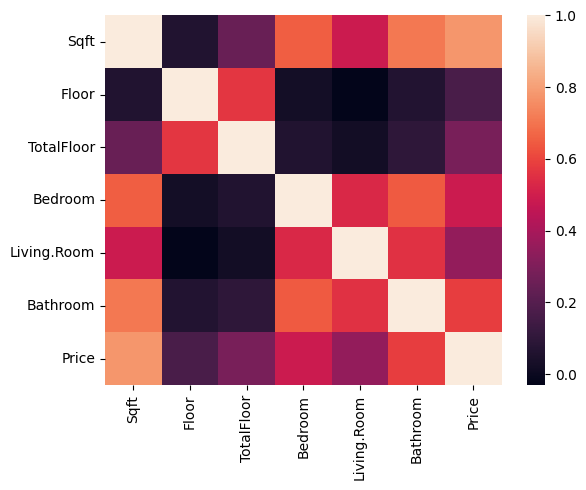

In [291]:
sns.heatmap(df.corr())

<Axes: xlabel='Price', ylabel='Count'>

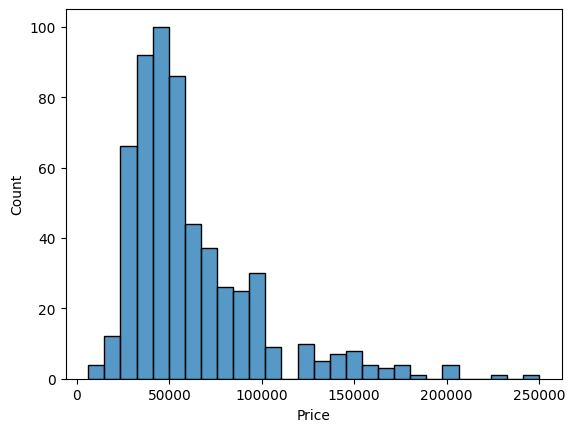

In [251]:
sns.histplot(df['Price'])


<Axes: xlabel='Sqft', ylabel='Count'>

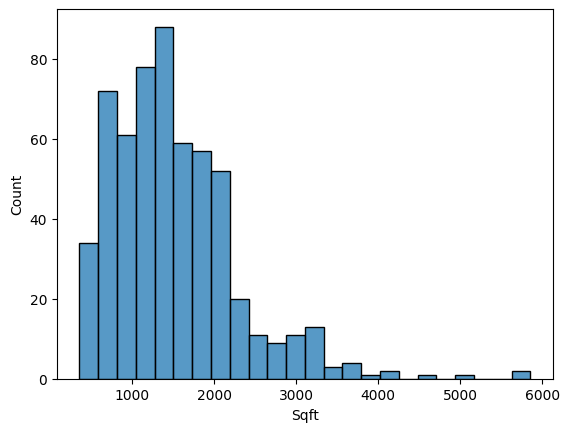

In [216]:
sns.histplot(df['Sqft'])


In [252]:
np.percentile(df['Price'],99),np.percentile(df['Sqft'],99)

(188300.0000000004, 3897.4332000000068)

In [253]:
df= df.drop(df[df['Price']>np.percentile(df['Price'],99)].index)
df= df.drop(df[df['Sqft']>np.percentile(df['Sqft'],99)].index)

In [218]:
df.shape

(567, 7)

<Axes: xlabel='Price', ylabel='Count'>

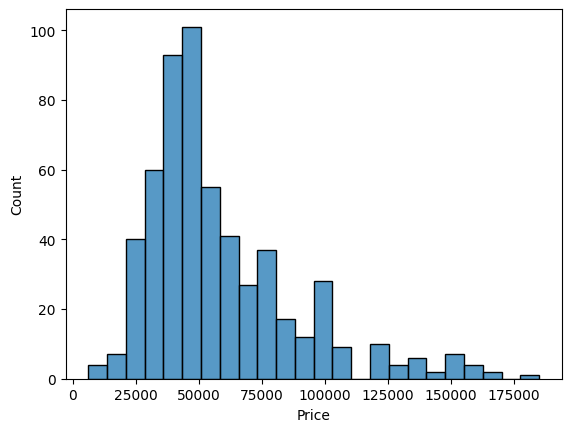

In [219]:
sns.histplot(df['Price'])


<Axes: xlabel='Sqft', ylabel='Count'>

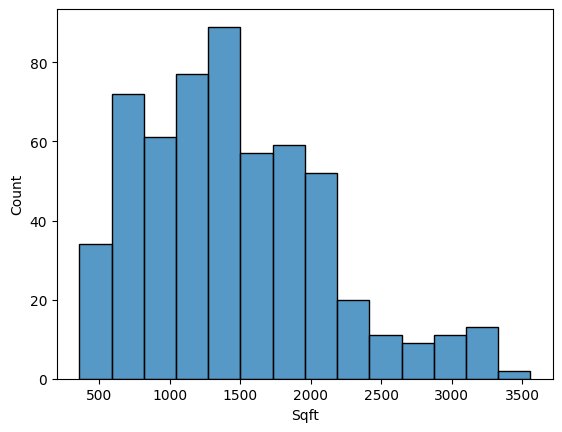

In [220]:
sns.histplot(df['Sqft'])


In [92]:
df.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [120]:
df[(df['Sqft']==0)|(df['Price']==0)]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price


In [254]:
x = df.drop('Price',axis=1)
y = df[['Price']]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.25,random_state=42)
x_train.shape ,x_test.shape,y_train.shape,y_test.shape

((425, 6), (142, 6), (425, 1), (142, 1))

In [255]:
pca=PCA(n_components=2)
two_d=pca.fit_transform(x)

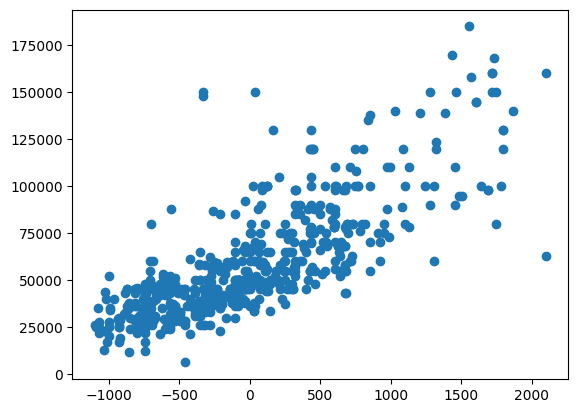

In [256]:
plt.scatter(two_d[:,0],y)

In [257]:
sc=RobustScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [258]:
x_train

array([[ 1.89962825,  0.        , -0.85714286,  0.5       ,  0.        ,
         0.        ],
       [ 0.78438662,  0.2       , -0.71428571,  0.        ,  0.        ,
         0.        ],
       [-0.00743494,  0.2       , -0.71428571,  0.        ,  0.        ,
        -1.        ],
       ...,
       [-0.00371747,  0.2       ,  0.14285714,  0.        ,  0.        ,
         0.        ],
       [ 1.59851301,  0.        ,  0.42857143,  0.        ,  0.        ,
         0.        ],
       [ 0.7472119 ,  0.4       ,  0.42857143,  0.5       ,  0.        ,
         0.        ]])

In [259]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [260]:
y_pred=model.predict(x_test)

In [261]:
two_td=pca.fit_transform(x_test)

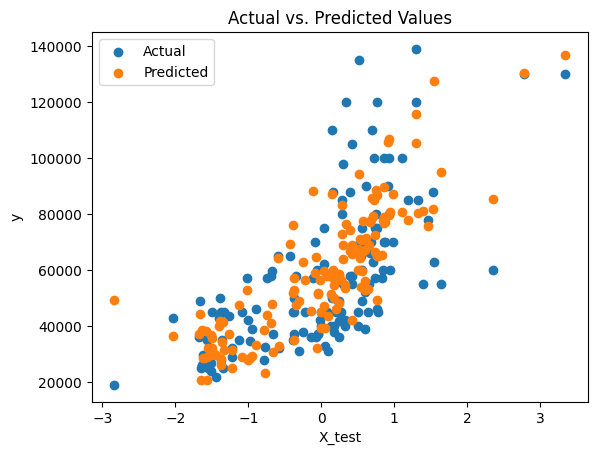

In [262]:
plt.scatter(two_td[:,0],y_test,label='Actual')
plt.scatter(two_td[:,0],y_pred,label='Predicted')
plt.xlabel('X_test')
plt.ylabel('y')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [264]:
np.sqrt(mean_squared_error(y_test,y_pred))

16518.377854449238

In [277]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)

In [278]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", np.sqrt(mse))

Mean Squared Error (MSE): 16497.625247115753
